<h1>Astro 283 Homework 3</h1>
Bijan Pourhamzeh

<h3>Finding the best fit parameters</h3>

To find the marginal distribution for the flux of the star, we want to calculate $P\left(F\mid\{D_{x,y}\},I\right)$, where $I$ is any background information like the model we are using, etc. The model we use to fit the data will involve several parameters, so we put them all together in 
$$ \vec{z}_0 = \left(\sigma_0,x_0,y_0,F,B\right) $$

We will describe these parameters later when they are calculated. The marginal distribution of the flux, $F$, is then

$$ P\left(F\mid\{D_{x,y}\},I\right) = \int p\left(\vec{z}_0 \mid \{D_{x,y}\}, I\right)d\sigma_0dx_0dy_0dB $$

From Baye's theorem, assuming a uniform prior $p\left(\vec{z}_0\mid I\right)$, we have
$$ p\left(\vec{z}_0 \mid \{D_{x,y}\}, I\right) = \frac{p\left(\{D_{x,y}\}\mid \vec{z}_0, I\right)}{\int p\left(\{D_{x,y}\}\mid \vec{z}_0, I\right) d^5\vec{z}_0} $$

Before we carry out the integral, we need to find the best fit parameters $\vec{z}_0$ given the data and the covariance matrix, which will give an estimate of the errors in the fit. To do this, we assume that at each pixel, the photon-counting distribution is Poisson. Moreover, since the counts are large, the Poisson distribution can be approximated as a Gaussian distribution. Specifically, at each pixel we have
$$ p\left(\vec{z}_0 \mid \{D_{x,y}\}, I\right) \propto \exp\left[-\frac{(D_{x,y} - f(x,y,\vec{z}_0))^2}{2\sigma_{x,y}^2}\right] $$

We also assume the stellar point-spread function is azimuthally symmetric Gaussian, which means we fit the data to a function $f$ of the form
$$ f(x,y,\vec{z}_0) = F\exp\left[-\frac{(x-x_0)^2 + (y-y_0)^2}{2\sigma_0}\right] + B $$

Using the least-squares fitting routine in scipy.optimize called curve_fit, we find the best fit parameters and covariance matrix $\Sigma$ below. To do the fit, we assume $\sigma_{x,y}^2 \propto D_{x,y}$. The results are shown below.

In [95]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
from astropy.io import fits

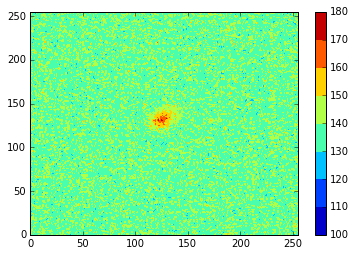

In [96]:
#Import file and plot data

starfile = fits.open('hw3prob1-data.fits')
stardata = starfile[0].data
plt.contourf(stardata)
plt.colorbar()

In [97]:
def gaussian_f(z,sig,x0,y0,F,B):
    #Model function to fit the data
    return F*np.exp(-1/(2*sig**2)*((z[0]-x0)**2+(z[1]-y0)**2)) + B

In [98]:
#Using curve_fit to fit stardata to gaussian_f. Initial values are chosen by inspection of the data.
#The parameters are in the list popt and the covariance matrix is in the matrix pcov.

x_vals = np.linspace(0,stardata.shape[0]-1,stardata.shape[0])
y_vals = np.linspace(0,stardata.shape[1]-1,stardata.shape[1])
x_vals,y_vals = np.meshgrid(x_vals,y_vals)
initial = (25.,125.,125.,80.,100.)
sigma_0 = np.sqrt(stardata)
popt, pcov = opt.curve_fit(gaussian_f, (x_vals.ravel(),y_vals.ravel()), stardata.ravel(), p0=initial
                           , sigma=sigma_0.ravel())

In [99]:
print(popt)
print('')
print(pcov)

[   7.12829056  125.97498933  132.4524456    26.19083029  133.01419728]

[[  2.23752326e-02   9.41127093e-05   6.88959870e-05  -8.47603889e-02
   -3.87850761e-04]
 [  9.41127093e-05   4.48105292e-02   4.12906456e-04  -7.26865505e-04
    1.70752622e-07]
 [  6.88959870e-05   4.12906456e-04   4.48861812e-02  -5.19953825e-04
    4.73935598e-08]
 [ -8.47603889e-02  -7.26865505e-04  -5.19953825e-04   6.38845384e-01
    5.40747805e-05]
 [ -3.87850761e-04   1.70752622e-07   4.73935598e-08   5.40747805e-05
    6.92898720e-04]]


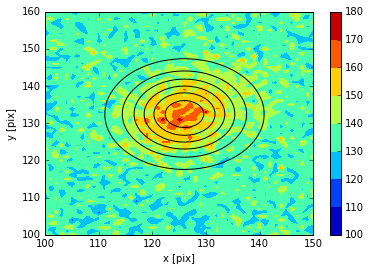

In [100]:
#Plotting fit over data and zoomed in. Looks good!

plt.contourf(stardata)
plt.colorbar()
plt.contour(x_vals,y_vals,gaussian_f((x_vals,y_vals),popt[0],popt[1],popt[2],popt[3],popt[4]), colors='black')
plt.axis([100,150,100,160])
plt.xlabel('x [pix]')
plt.ylabel('y [pix]')

<h3>Finding the marginal distributions</h3>

Now that we have the best fit parameters and the covariance matrix, we can use fact that integrating the 5-dimensional Gaussian reduces to another Gaussian. The best fit parameters give us the means and the entries of the covariance matrix give us the variances. In particular, the marginal distribution for the flux of the star is 
$$ P\left(F\mid \{D_{x,y}\},I\right) = \frac{1}{\sqrt{2\pi\sigma_F^2}}\exp\left[-\frac{(F-F_0)^2}{2\sigma_F^2}\right] $$
where $F_0 = 26.19$ and $\sigma_F^2 = 0.64$, which are read off from the 4th entry of popt and the (4,4) entry of pcov. This is DN units. To convert to photoelectrons, we multiply both $F$ and $\sigma_F$ by 3.0 $e^-$/DN.

To get the marginal distribution for the position of the star, we use the same argument to say that the result of the marginalization over the parameters $(\sigma_0,F,B)$ is a 2-dimensional Gaussian. The result is
$$ P\left(x,y\mid \{D_{x,y}\},I\right) = \frac{1}{2\pi\det\Sigma^\prime}\exp\left[-\frac{1}{2}X^T\Sigma^{\prime -1}X\right] $$
where
$$ X = \left(
\begin{array}{ccc}
x - x_0\\
y - y_0
\end{array}
\right)
$$
, $x_0=125.97$, and $y_0= 132.45$. The matrix $\Sigma^\prime$ is given by the
$$
\Sigma^\prime = \left(
\begin{array}{ccc}
4.48\times 10^{-2} & 4.13\times 10^{-4}\\
4.13\times 10^{-4} & 4.48\times 10^{-2}
\end{array}
\right)
$$
These values are in units of pixels. 